In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from os import listdir
import torch
location_of_data = '/content/drive/My Drive/TDR/fotos 3/train/'
location_of_data_test = '/content/drive/My Drive/TDR/fotos 3/validate/'
listdir(location_of_data)

['2022-05-17_12.26.27.jpg',
 '2022-05-17_12.26.27_2.jpg',
 '2022-05-17_12.26.28.jpg',
 '2022-05-17_12.26.29.jpg',
 '2022-05-17_12.25.02.jpg',
 '2022-05-17_12.26.05.jpg',
 '2022-05-17_12.26.03.jpg',
 '2022-05-17_12.26.06.jpg',
 '2022-05-17_12.26.07.jpg',
 '2022-05-17_12.26.07_2.jpg',
 '2022-05-17_12.26.09.jpg',
 '2022-05-17_12.26.14.jpg',
 '2022-05-17_12.26.15.jpg',
 '2022-05-17_12.26.16.jpg',
 '2022-05-17_12.26.16_2.jpg',
 '2022-05-17_12.26.18.jpg',
 '2022-05-17_12.26.24.jpg',
 '2022-05-17_12.26.24_2.jpg',
 '2022-05-17_12.26.25.jpg',
 '2022-05-17_12.26.26.jpg',
 '2022-05-17_12.26.35.jpg',
 '2022-05-17_12.26.36.jpg',
 '2022-05-17_12.26.36_2.jpg',
 '2022-05-17_12.26.37.jpg',
 '2022-05-17_12.26.37_2.jpg',
 '2022-05-17_12.26.38.jpg',
 '2022-05-17_12.26.39.jpg',
 '2022-05-17_12.26.40.jpg',
 '2022-05-17_12.26.52.jpg',
 '2022-05-17_12.26.53.jpg',
 '2022-05-17_12.26.53_2.jpg',
 '2022-05-17_12.26.54.jpg',
 '2022-05-17_12.26.54_2.jpg',
 '2022-05-17_12.26.54_3.jpg',
 '2022-05-17_12.26.56.jpg',
 '

In [3]:
!pip install detecto

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
import matplotlib.pyplot as plt

from detecto.utils import read_image

In [5]:
'''
sample_image = '2022-03-06_19.50.48.jpg'
test_image = "2022-03-24_20.06.45.jpg"

image = read_image(location_of_data+sample_image)
imagetest = read_image(location_of_data_test+test_image)
plt.imshow(image)
plt.show()'''

'\nsample_image = \'2022-03-06_19.50.48.jpg\'\ntest_image = "2022-03-24_20.06.45.jpg"\n\nimage = read_image(location_of_data+sample_image)\nimagetest = read_image(location_of_data_test+test_image)\nplt.imshow(image)\nplt.show()'

In [6]:
from detecto.core import Dataset
dataset = Dataset(location_of_data)

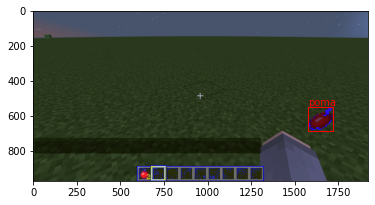

In [7]:
from detecto.visualize import show_labeled_image

image, targets = dataset[10]
show_labeled_image(image, targets['boxes'], targets['labels'])

In [8]:
from detecto.core import DataLoader, Model

labels = ['poma']

model = Model(labels)

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


  0%|          | 0.00/160M [00:00<?, ?B/s]

In [9]:
model.fit(dataset)

Epoch 1 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:14<00:00,  3.43it/s]


Epoch 2 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:14<00:00,  3.55it/s]


Epoch 3 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:14<00:00,  3.48it/s]


Epoch 4 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:14<00:00,  3.41it/s]


Epoch 5 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:15<00:00,  3.24it/s]


Epoch 6 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:15<00:00,  3.28it/s]


Epoch 7 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:15<00:00,  3.28it/s]


Epoch 8 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:15<00:00,  3.33it/s]


Epoch 9 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:15<00:00,  3.35it/s]


Epoch 10 of 10
Begin iterating over training dataset


100%|██████████| 51/51 [00:15<00:00,  3.34it/s]


In [10]:
test_image='2022-05-17_15.52.41.jpg'
image = read_image(location_of_data_test+test_image)
labels, boxes, scores = model.predict(image) #Aquesta merda està malament perquè t'està predint una de cada no pas les millors i prou

In [11]:
print('labels', labels)
print('boxes', boxes)
print('scores', scores)
threshold = 0.8

llista_boxes = boxes.tolist()
boxes_salvats=[]
labels_salvats=[]
for i in range(len(scores)):
  if scores[i]>threshold:
    labels_salvats.append(labels[i])
    boxes_salvats.append(llista_boxes[i])

boxes_salvats = torch.FloatTensor(boxes_salvats)

labels ['poma', 'poma', 'poma', 'poma', 'poma', 'poma', 'poma', 'poma', 'poma', 'poma', 'poma', 'poma', 'poma', 'poma', 'poma', 'poma', 'poma', 'poma', 'poma', 'poma', 'poma']
boxes tensor([[ 393.7603,  360.3794,  463.2560,  435.6147],
        [1426.9491,  432.4501, 1518.9193,  529.5187],
        [ 653.2538,  457.4207,  716.7029,  573.1167],
        [ 969.7334,  377.5043, 1026.4988,  451.0736],
        [1358.3875,  336.4042, 1407.7910,  401.2830],
        [ 568.2565,  374.8456,  633.3562,  451.8917],
        [1135.9706,  310.4290, 1157.2544,  351.7299],
        [ 919.4182,  340.3496,  970.0474,  394.4684],
        [ 638.7288,  320.6286,  687.9406,  371.6504],
        [1525.6642,  491.4776, 1645.3484,  629.3553],
        [ 896.0015,  307.8952,  933.7351,  352.9197],
        [1432.1764,  455.4564, 1694.5066,  974.0000],
        [ 887.6626,  238.4740,  934.8979,  289.8453],
        [1595.7284,  618.0690, 1920.0000,  974.0000],
        [1446.5183,  501.0733, 1904.9386,  974.0000],
        

In [12]:
#IntTensor.item() per provar

#El segon és la alçada
#El primer es l'esquerra
#el tercer es la dreta
#hem de comparar el segon amb el darrer.
distancies = []
for i in boxes_salvats:
  distancies.append(str(i[3]-i[1]))

for j in range(len(distancies)):
  distancies[j] = distancies[j][7:-1]

for k in range(len(labels_salvats)):
  labels_salvats[k] = labels_salvats[k] + " " + distancies[k]

#strr = str(distancies)
#res_str = strr[:2] +  strr[3:] 
#res_str

In [13]:
boxes_salvats

tensor([[ 393.7603,  360.3794,  463.2560,  435.6147],
        [1426.9491,  432.4501, 1518.9193,  529.5187],
        [ 653.2538,  457.4207,  716.7029,  573.1167],
        [ 969.7334,  377.5043, 1026.4988,  451.0736],
        [1358.3875,  336.4042, 1407.7910,  401.2830],
        [ 568.2565,  374.8456,  633.3562,  451.8917],
        [1135.9706,  310.4290, 1157.2544,  351.7299],
        [ 919.4182,  340.3496,  970.0474,  394.4684],
        [ 638.7288,  320.6286,  687.9406,  371.6504],
        [1525.6642,  491.4776, 1645.3484,  629.3553],
        [ 896.0015,  307.8952,  933.7351,  352.9197]])

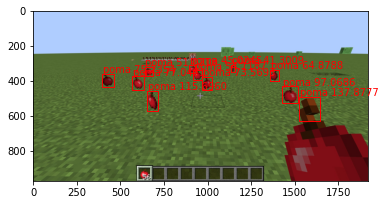

In [14]:
from detecto.visualize import show_labeled_image
import numpy as np
show_labeled_image(image,boxes_salvats, labels_salvats) 

#per guardar el model
#balanç dataset fet a mitjes
#propera reunió despres de dijous
#El tope son 1920 nai!!!!

In [15]:
model.save('/content/drive/My Drive/TDR/model pomes.pth')

In [16]:
#model = Model.load('your_save_file.pth', labels)

Epoch 1 of 20
Begin iterating over training dataset


100%|██████████| 26/26 [00:15<00:00,  1.69it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:09<00:00,  5.37it/s]


Loss: 0.02444385722571728
Epoch 2 of 20
Begin iterating over training dataset


100%|██████████| 26/26 [00:15<00:00,  1.67it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:09<00:00,  5.62it/s]


Loss: 0.023451955952480726
Epoch 3 of 20
Begin iterating over training dataset


100%|██████████| 26/26 [00:15<00:00,  1.70it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:08<00:00,  5.67it/s]


Loss: 0.0234553188487303
Epoch 4 of 20
Begin iterating over training dataset


100%|██████████| 26/26 [00:15<00:00,  1.70it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:09<00:00,  5.64it/s]


Loss: 0.02187299337603298
Epoch 5 of 20
Begin iterating over training dataset


100%|██████████| 26/26 [00:15<00:00,  1.69it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:09<00:00,  5.63it/s]


Loss: 0.021675091866842088
Epoch 6 of 20
Begin iterating over training dataset


100%|██████████| 26/26 [00:15<00:00,  1.69it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:09<00:00,  5.63it/s]


Loss: 0.020040701764325302
Epoch 7 of 20
Begin iterating over training dataset


100%|██████████| 26/26 [00:15<00:00,  1.69it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:09<00:00,  5.64it/s]


Loss: 0.019182867562288746
Epoch 8 of 20
Begin iterating over training dataset


100%|██████████| 26/26 [00:15<00:00,  1.69it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:09<00:00,  5.64it/s]


Loss: 0.019596825098144074
Epoch 9 of 20
Begin iterating over training dataset


100%|██████████| 26/26 [00:15<00:00,  1.69it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:09<00:00,  5.63it/s]


Loss: 0.01983589143948812
Epoch 10 of 20
Begin iterating over training dataset


100%|██████████| 26/26 [00:15<00:00,  1.69it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:09<00:00,  5.64it/s]


Loss: 0.02010413810756861
Epoch 11 of 20
Begin iterating over training dataset


100%|██████████| 26/26 [00:15<00:00,  1.69it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:09<00:00,  5.67it/s]


Loss: 0.019890937588962855
Epoch 12 of 20
Begin iterating over training dataset


100%|██████████| 26/26 [00:15<00:00,  1.69it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:09<00:00,  5.65it/s]


Loss: 0.020046658165679843
Epoch 13 of 20
Begin iterating over training dataset


100%|██████████| 26/26 [00:15<00:00,  1.69it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:09<00:00,  5.66it/s]


Loss: 0.019990951306752713
Epoch 14 of 20
Begin iterating over training dataset


100%|██████████| 26/26 [00:15<00:00,  1.69it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:09<00:00,  5.65it/s]


Loss: 0.020017869533130936
Epoch 15 of 20
Begin iterating over training dataset


100%|██████████| 26/26 [00:15<00:00,  1.69it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:09<00:00,  5.46it/s]


Loss: 0.020145519417436683
Epoch 16 of 20
Begin iterating over training dataset


100%|██████████| 26/26 [00:15<00:00,  1.68it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:09<00:00,  5.63it/s]


Loss: 0.019667689031099573
Epoch 17 of 20
Begin iterating over training dataset


100%|██████████| 26/26 [00:15<00:00,  1.69it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:09<00:00,  5.66it/s]


Loss: 0.01956202705189878
Epoch 18 of 20
Begin iterating over training dataset


100%|██████████| 26/26 [00:15<00:00,  1.69it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:09<00:00,  5.66it/s]


Loss: 0.019063094229090447
Epoch 19 of 20
Begin iterating over training dataset


100%|██████████| 26/26 [00:15<00:00,  1.69it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:09<00:00,  5.64it/s]


Loss: 0.020263574031345984
Epoch 20 of 20
Begin iterating over training dataset


100%|██████████| 26/26 [00:15<00:00,  1.69it/s]


Begin iterating over validation dataset


100%|██████████| 51/51 [00:08<00:00,  5.68it/s]


Loss: 0.020138900069629446


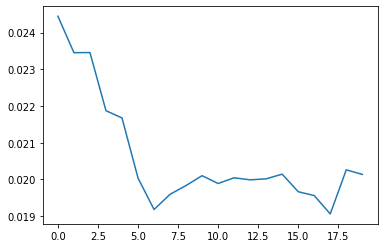

In [17]:
import matplotlib.pyplot as plt
import detecto.core as core
loader = core.DataLoader(dataset, batch_size=2, shuffle=True)

losses = model.fit(loader, dataset, epochs=20, learning_rate=0.001, 
                   lr_step_size=5, verbose=True)
                   
plt.plot(losses)
plt.show()